### Python 的数据可视化笔记 （Matplotlib, Seaborn, Altair)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

### Step 1: Loading and cleaning the data
The data is from https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018 

In [2]:
data1 = pd.read_csv('./data/forbes_2018.csv')

In [3]:
data1 =data1.loc[:, ['name', 'age','country','gender','worth']]
#Extract the needed attributes

In [4]:
data1 = data1.dropna(axis='rows', how='any')  
#do not consider the NoData
data1

,name,age,country,gender,worth
52,Jeff Bezos,54.0,United States,M,112000.0
53,Bill Gates,62.0,United States,M,90000.0
54,Warren Buffett,87.0,United States,M,84000.0
55,Bernard Arnault,69.0,France,M,72000.0
56,Mark Zuckerberg,34.0,United States,M,71000.0
...,...,...,...,...,...
2255,Zhao Xiaoqiang,51.0,China,M,1000.0
2256,Zhou Liangzhang,55.0,China,M,1000.0
2257,Zhu Xingming,51.0,China,M,1000.0
2258,Zhuo Jun,52.0,Hong Kong,F,1000.0


In [5]:
data1['country'].value_counts()

#According to the country classification, select the top eight countries with the largest number of billionaires

United States    579
China            367
Germany          111
India            111
Russia           101
                ... 
Guernsey           1
Slovakia           1
Hungary            1
Nepal              1
Iceland            1
Name: country, Length: 72, dtype: int64

In [6]:
richest = ['United States','China','India','Germany','Russia','Hongkong','United Kingdom','Canada','South Korea']
selection = data1['country'].isin(richest)
data = data1.loc[selection]
data

,name,age,country,gender,worth
52,Jeff Bezos,54.0,United States,M,112000.0
53,Bill Gates,62.0,United States,M,90000.0
54,Warren Buffett,87.0,United States,M,84000.0
56,Mark Zuckerberg,34.0,United States,M,71000.0
59,Charles Koch,82.0,United States,M,60000.0
...,...,...,...,...,...
2253,Yang Jianxin,49.0,China,M,1000.0
2254,Yao Xinyi,53.0,China,M,1000.0
2255,Zhao Xiaoqiang,51.0,China,M,1000.0
2256,Zhou Liangzhang,55.0,China,M,1000.0


In [7]:
mean_age = data['age'].mean()
mean_worth = data['worth'].mean()
print(mean_worth)
print(mean_age)

#Calculate the average worth and age of selected billionaires, which will be used in subsequent plots

4223.934659090909
62.64133522727273


### Step 2:Matplotlib chart 

In this step,I choose to use the scatter plot to visulize my data, for the reason that there are two variable that I want to observe the correlation between them，the age and the worth value of billionairs .The scatter plot is more intuitive, it also reflects the trend of distribution.

I choose Matplotlib is beacuse it always do well with the personal setting，Whether it is a scatter plot or a legend, etc. The data set I want to display has three variables, countries, worth and ages.The countries can be classified in to kinds.But there are many values in worth and ages. The adequate setup choices in Matplotlib are important.

Plotting Canada...
Plotting China...
Plotting Germany...
Plotting India...
Plotting Russia...
Plotting South Korea...
Plotting United Kingdom...
Plotting United States...


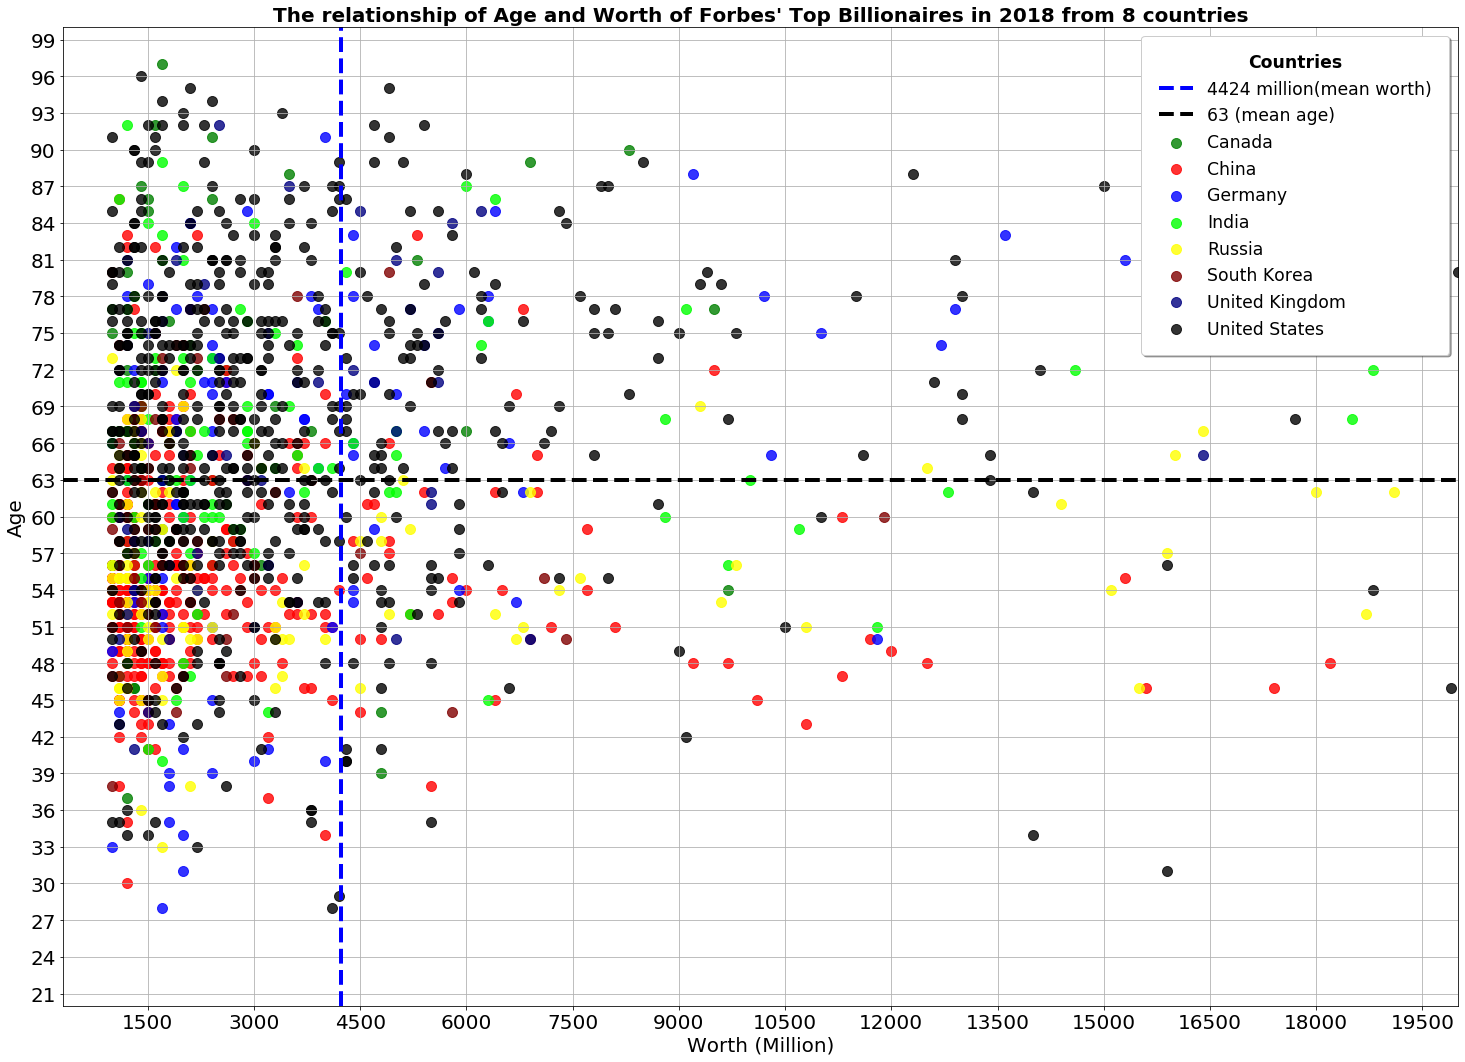

In [8]:
fig, ax = plt.subplots(figsize=(25, 18))      #set the size of this chart

color_map = {"United States": "#000000", 
             "China": "#ff0000",
             "India": "#00ff00",
             "Germany":"#0000ff",
             "Russia":"#ffff00",
             "Hongkong":"#ff00ff",
             "United Kingdom":"#000080",
             "Canada":"#008000",
             "South Korea":"#800000"
            }

"""
There are some tips in setting the color.
I give the United States, China,India and German high contrast color to identify the distribution trend.

I think it is a good idea to give them different symbols to make it more clear, such as triangles and squares. 
But I didn't reach out how to loop to assign a shape.
It means if i want to change the symbol it has to be repeated many times manually.
"""


for country, group in data.groupby("country"):
    print(f"Plotting {country}...")                 #group by contries


# Plot the worth and age of these billionaires
    ax.scatter(
        group["worth"],
        group["age"],
        marker='o',
        s=100,
        label=country,
        color=color_map[country],
        alpha=0.8,)

# adjust the format to make it better!

plt.axvline(np.around(np.mean(data['worth']), decimals=0, out=None),color='b',linestyle='dashed',linewidth=4,label = '4424 million(mean worth)')
plt.axhline(np.around(np.mean(data['age']), decimals=0, out=None),color='k',linestyle='dashed',linewidth=4,label = '63 (mean age)')
# set the line represent for the mean value
# I have a problem about how to let the label string to be the value automatically as front np.mean(data['worth']

ax.legend(loc='best')
ax.set_title("The relationship of Age and Worth of Forbes' Top Billionaires in 2018 from 8 countries",fontsize=20,fontweight='bold')
leg = ax.legend(loc=1,fontsize = 'xx-large',title='Countries',fancybox=True, framealpha=1, shadow=True, borderpad=1)
leg.set_title("Countries", prop = {'size':'xx-large','weight':'bold'})  #set the legend
ax.set_xlabel("Worth (Million)",fontsize=20)
ax.set_ylabel("Age",fontsize=20)
ax.set_xlim(300, 20000)
ax.set_ylim(20, 100)
xtick_spacing = 1500
ax.xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ytick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing)) 
ax.tick_params(labelsize=20)
ax.grid(True)

**Conclusion**:The billionaires in the United States have the most and cover the entire age group. In comparison, China has the second      largest number of billionaires. China and Russia have very young billionaires. They are generally under 70 years old and relatively young. Among the billionaires, the richest people are also the most from the United States.

### Step 3：Seaborn chart 

In the Seaborn,I chose the violinplot because it allows to visualize the distribution of multiple groups of numeric variables.<br>It is very close to the box plot, but it can get a deeper understanding of density.<br> Violinplots are especially useful in situations where the amount of data is large and individual observations cannot be displayed.<br> In my data, there are many age data that appear if you are classified by gender.<br>The plot below shows the distribution of age data in two categorical variables that can be compared.

In [9]:
import seaborn as sns

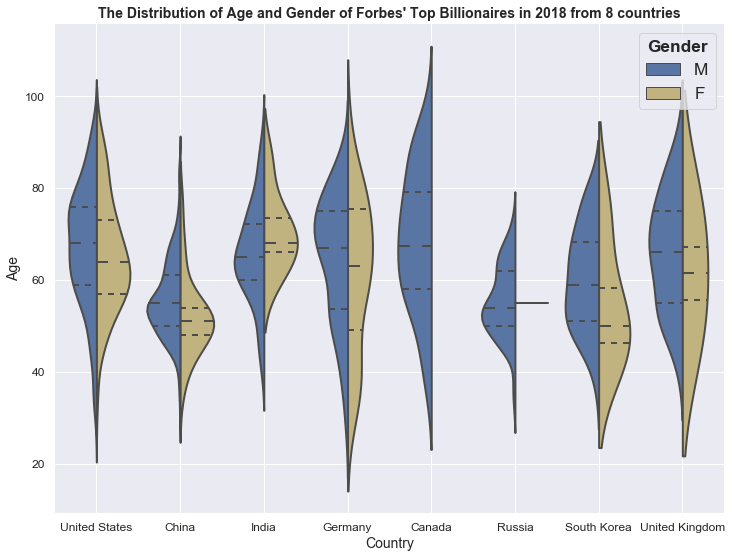

In [10]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=4)
sns.set(rc={'figure.figsize':(12,9)})    #set the plot attribute

ax=sns.violinplot(x="country", 
               y="age", 
               hue="gender",    #accorfing to gender divided into two kinds
               split=True, 
               inner="quart",
               linewidth=2,
               width = 0.8,
               palette={"M": "b", "F": "y"},
               gridsize = 50,
               data=data)

sns.despine(left=True)


#set a better format!
ax.legend(loc='best')
ax.set_title("The Distribution of Age and Gender of Forbes' Top Billionaires in 2018 from 8 countries",fontsize=14,fontweight='bold')
leg = ax.legend(loc=1,fontsize = 'x-large',title='Countries')
leg.set_title("Gender", prop = {'size':'x-large','weight':'bold'})
ax.set_xlabel("Country",fontsize=14)
ax.set_ylabel("Age",fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(True)

**Conclusion**:Comparing billionaires in these 8 countries，Canada has the most aged Male,and it is interesting that Canada don't have Female billionairs.Similarly,Russia also has really small number of the Female billionaires.Relatively,Chinese billionaires are younger.The range of distribution of age in US is most widely.In United Kingdom,the distribution of Female billionaires is more smooth.

### Step 4：3 interactive altair plots

In [11]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

###  *Figure 1*

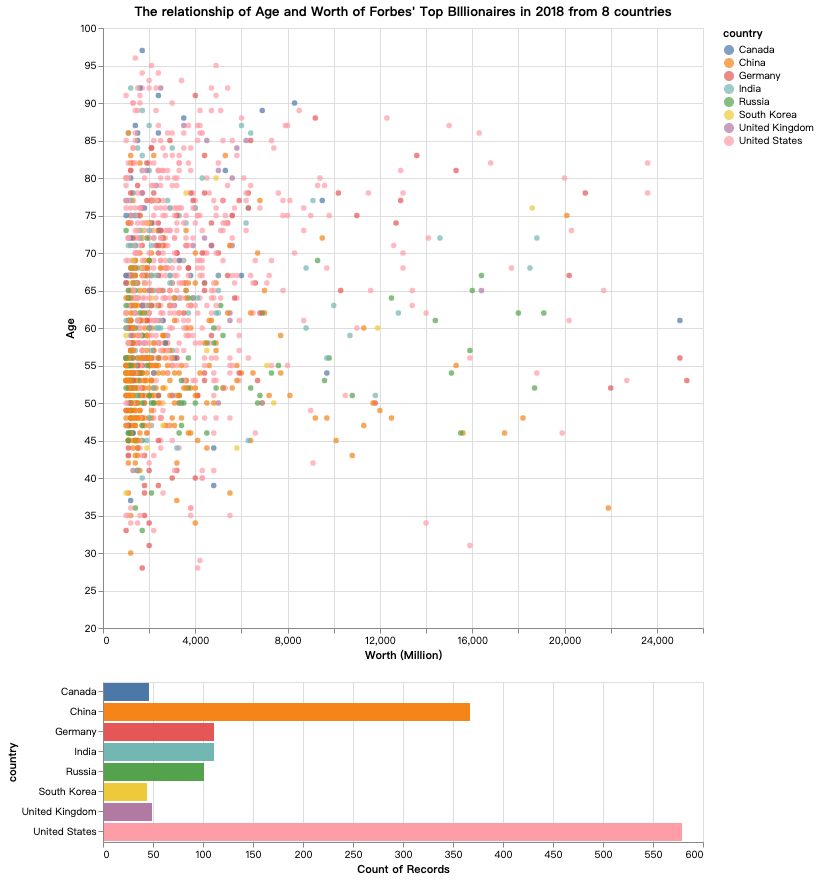

In [12]:
brush = alt.selection(type='interval')  #using the brush

xrange = (500,25000)   #set the range of x and y
yrange = (20,100)

points=alt.Chart(data).mark_circle(clip=True).encode(
        alt.X('worth', type='quantitative',scale=alt.Scale(domain=xrange),axis=alt.Axis(title="Worth (Million)")),
        alt.Y('age', type='quantitative',scale=alt.Scale(domain=yrange),axis=alt.Axis(title="Age")),
 
        color=alt.condition(brush, 'country', alt.value('lightgray')),
        tooltip=['name', 'age', 'gender', 'worth','country']).properties(
        width=600,
        height=600, 
        selection=brush).properties(title="The relationship of Age and Worth of Forbes' Top BIllionaires in 2018 from 8 countries"
                                    )

bars = alt.Chart(data).mark_bar().encode(
    y='country:N',
    color='country:N',
    x='count(country):Q'
).transform_filter(
    brush.ref() 
).properties(
width=600
)
# using 2-chart dashboard, where filtering of one chart cross-filters the other chart
chart = alt.vconcat(points, bars, data=data)
chart

**Conclusion**:According to the brush,there are many interest facts. Among the richest billionaires, Americans are the most, followed by Chinese. But for those who have just stepped into the hundreds of millions of clubs, China has the largest number of people, followed by the United States. When we put the richest people's standards down slightly and look at the rich people with assets of more than 16,000 million, Germany and Russia are second only to the United States and beyond China.

### *Figure 2*

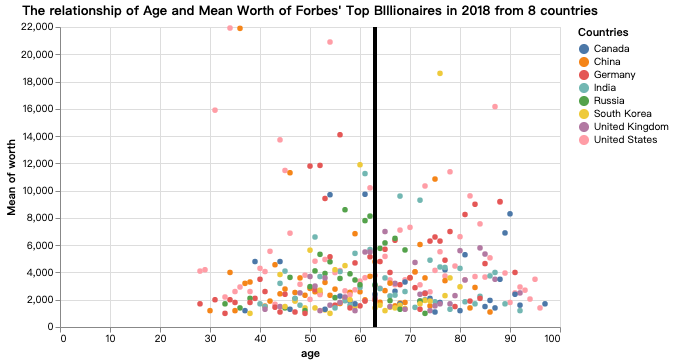

In [13]:
chart=alt.Chart(data).mark_circle().encode(
    x='age:Q',
    y='mean(worth):Q', # apply the mean method to the worth
    color=alt.Color("country:N",legend=alt.Legend(title="Countries")),
    tooltip=['mean(worth):Q','age:Q','country:N']
).properties(
    height=300,
    width=500
).properties(title="The relationship of Age and Mean Worth of Forbes' Top BIllionaires in 2018 from 8 countries"
                                    )
    

age = pd.DataFrame([{"age": 63}])
rule = alt.Chart(age).mark_rule(strokeWidth=4, color="black").encode(x="age:Q")
# failed to add a lengend or a number for the rule..
                                                

chart+rule

**Conclusion**:From the data point of view, the average age of billionaires is around 63 years old. Most national billionaires have an average asset of less than 8,000 million and are evenly distributed.

### Figure 3:

In [14]:
data1 = pd.read_csv('./data/forbes_2018.csv')
data1 =data1.loc[:, ['name', 'age','country','gender','worth']]
data1 = data1.dropna(axis='rows', how='any')

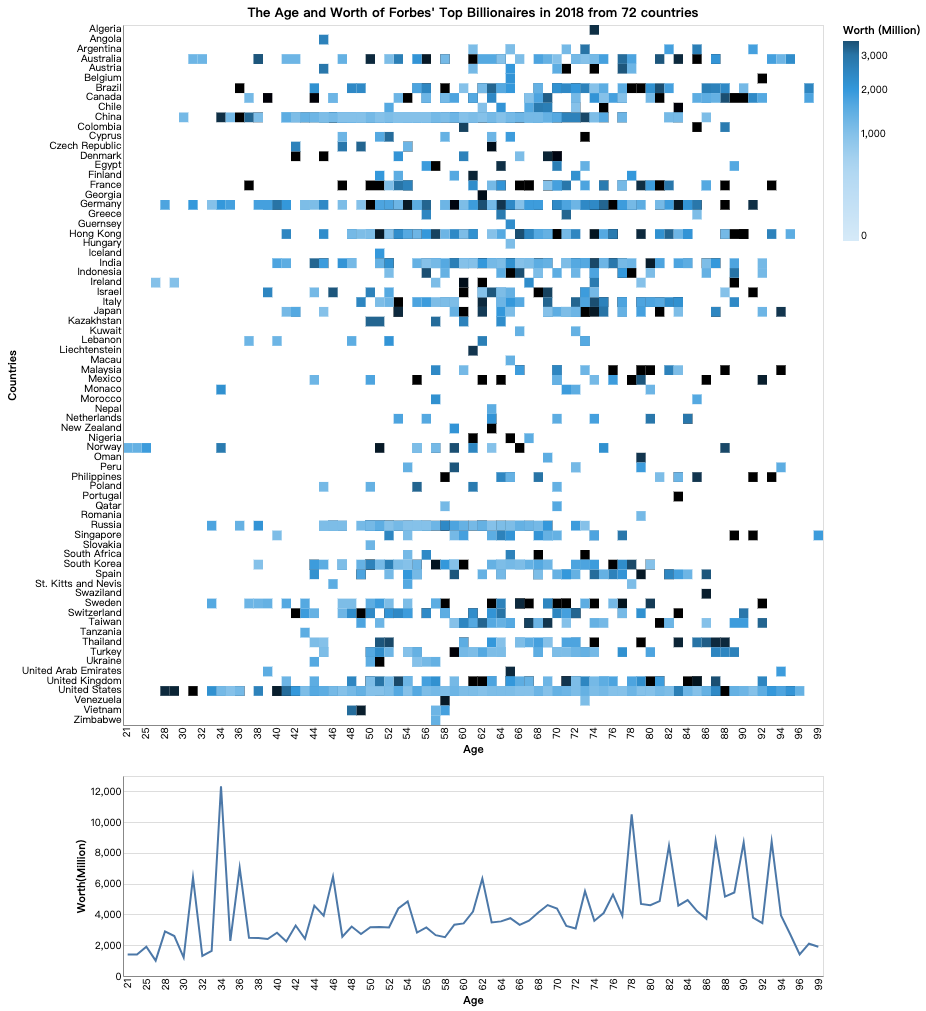

In [15]:
brush = alt.selection(type='interval')   #use the brush

colormap = alt.Scale(
    domain=[0,500,1000,1500,2000,2500,3000,3500],
    range=[
        "#D6EAF8",
        "#AED6F1",
        "#85C1E9",
        "#5DADE2",
        "#3498DB",
        "#2E86C1",
        "#2874A6",
        "#1B4F72"
        ],        #here choose the gradient color to make it clear
    type="sqrt",
)


chart = (
    alt.Chart(data1)
    .mark_rect()
    .encode(
        x=alt.X("age:O", axis=alt.Axis(title='Age', ticks=False)),
        y=alt.Y("country:N", axis=alt.Axis(title='Countries', ticks=False)),
        color=alt.Color("worth:Q", sort="ascending", scale=colormap,
                       legend=alt.Legend(title="Worth (Million)")),
        tooltip=["name","gender","worth","age"],
    )
    .properties(width=700, height=700,selection=brush,
                title="The Age and Worth of Forbes' Top Billionaires in 2018 from 72 countries")
)

worth_avg = (
    alt.Chart(data1)
    .mark_line()
    .encode(
        x=alt.X("age:O", axis=alt.Axis(title='Age', ticks=False)),
        y=alt.Y("mean(worth):Q", axis=alt.Axis(title='Worth(Million)', ticks=False)),
    ).transform_filter(
    brush.ref()
).properties(width=700, height=200)
)


alt.vconcat(chart,worth_avg)

**Conclusion**:It can be clearly seen from this plot that the number of billionaires in China, Germany, India, and the United States is the widest.Focusing on the Chinese data, the richest billionaire is 36 years old.Focusing on the US data, the richest billionaire is 34 years old.But it is undeniable that among the billionaires, the more money is more distributed after the age of 55.